<a href="https://colab.research.google.com/github/Sneha123-zudo/Machine-Learning---Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree Regression**

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import  load_diabetes
from sklearn.model_selection import GridSearchCV

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [3]:
df['target'] = diabetes.target

In [4]:
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)

In [7]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [8]:
y_pred = rt.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.2931991124096379

In [10]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [11]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

reg.fit(X_train,y_train)

reg.best_score_

reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 1.0,
 'min_samples_split': 0.25}

In [12]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)


bmi 0.5554235804166068
s5 0.1890724036574465
s1 0.06155043537879015
s6 0.05118584845941795
s2 0.034379665633135985
age 0.03286487337550924
bp 0.03027182084336133
s4 0.02664941870613714
s3 0.01679403696595409
sex 0.0018079165636406861


In [13]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [14]:
X=iris.data
y=iris.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)
X_train.shape
(120, 4)
X_test.shape
(30, 4)

(30, 4)

In [16]:

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.662\nsamples = 120\nvalue = [43, 44, 33]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.49\nsamples = 77\nvalue = [0, 44, 33]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.198\nsamples = 36\nvalue = [0, 4, 32]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 

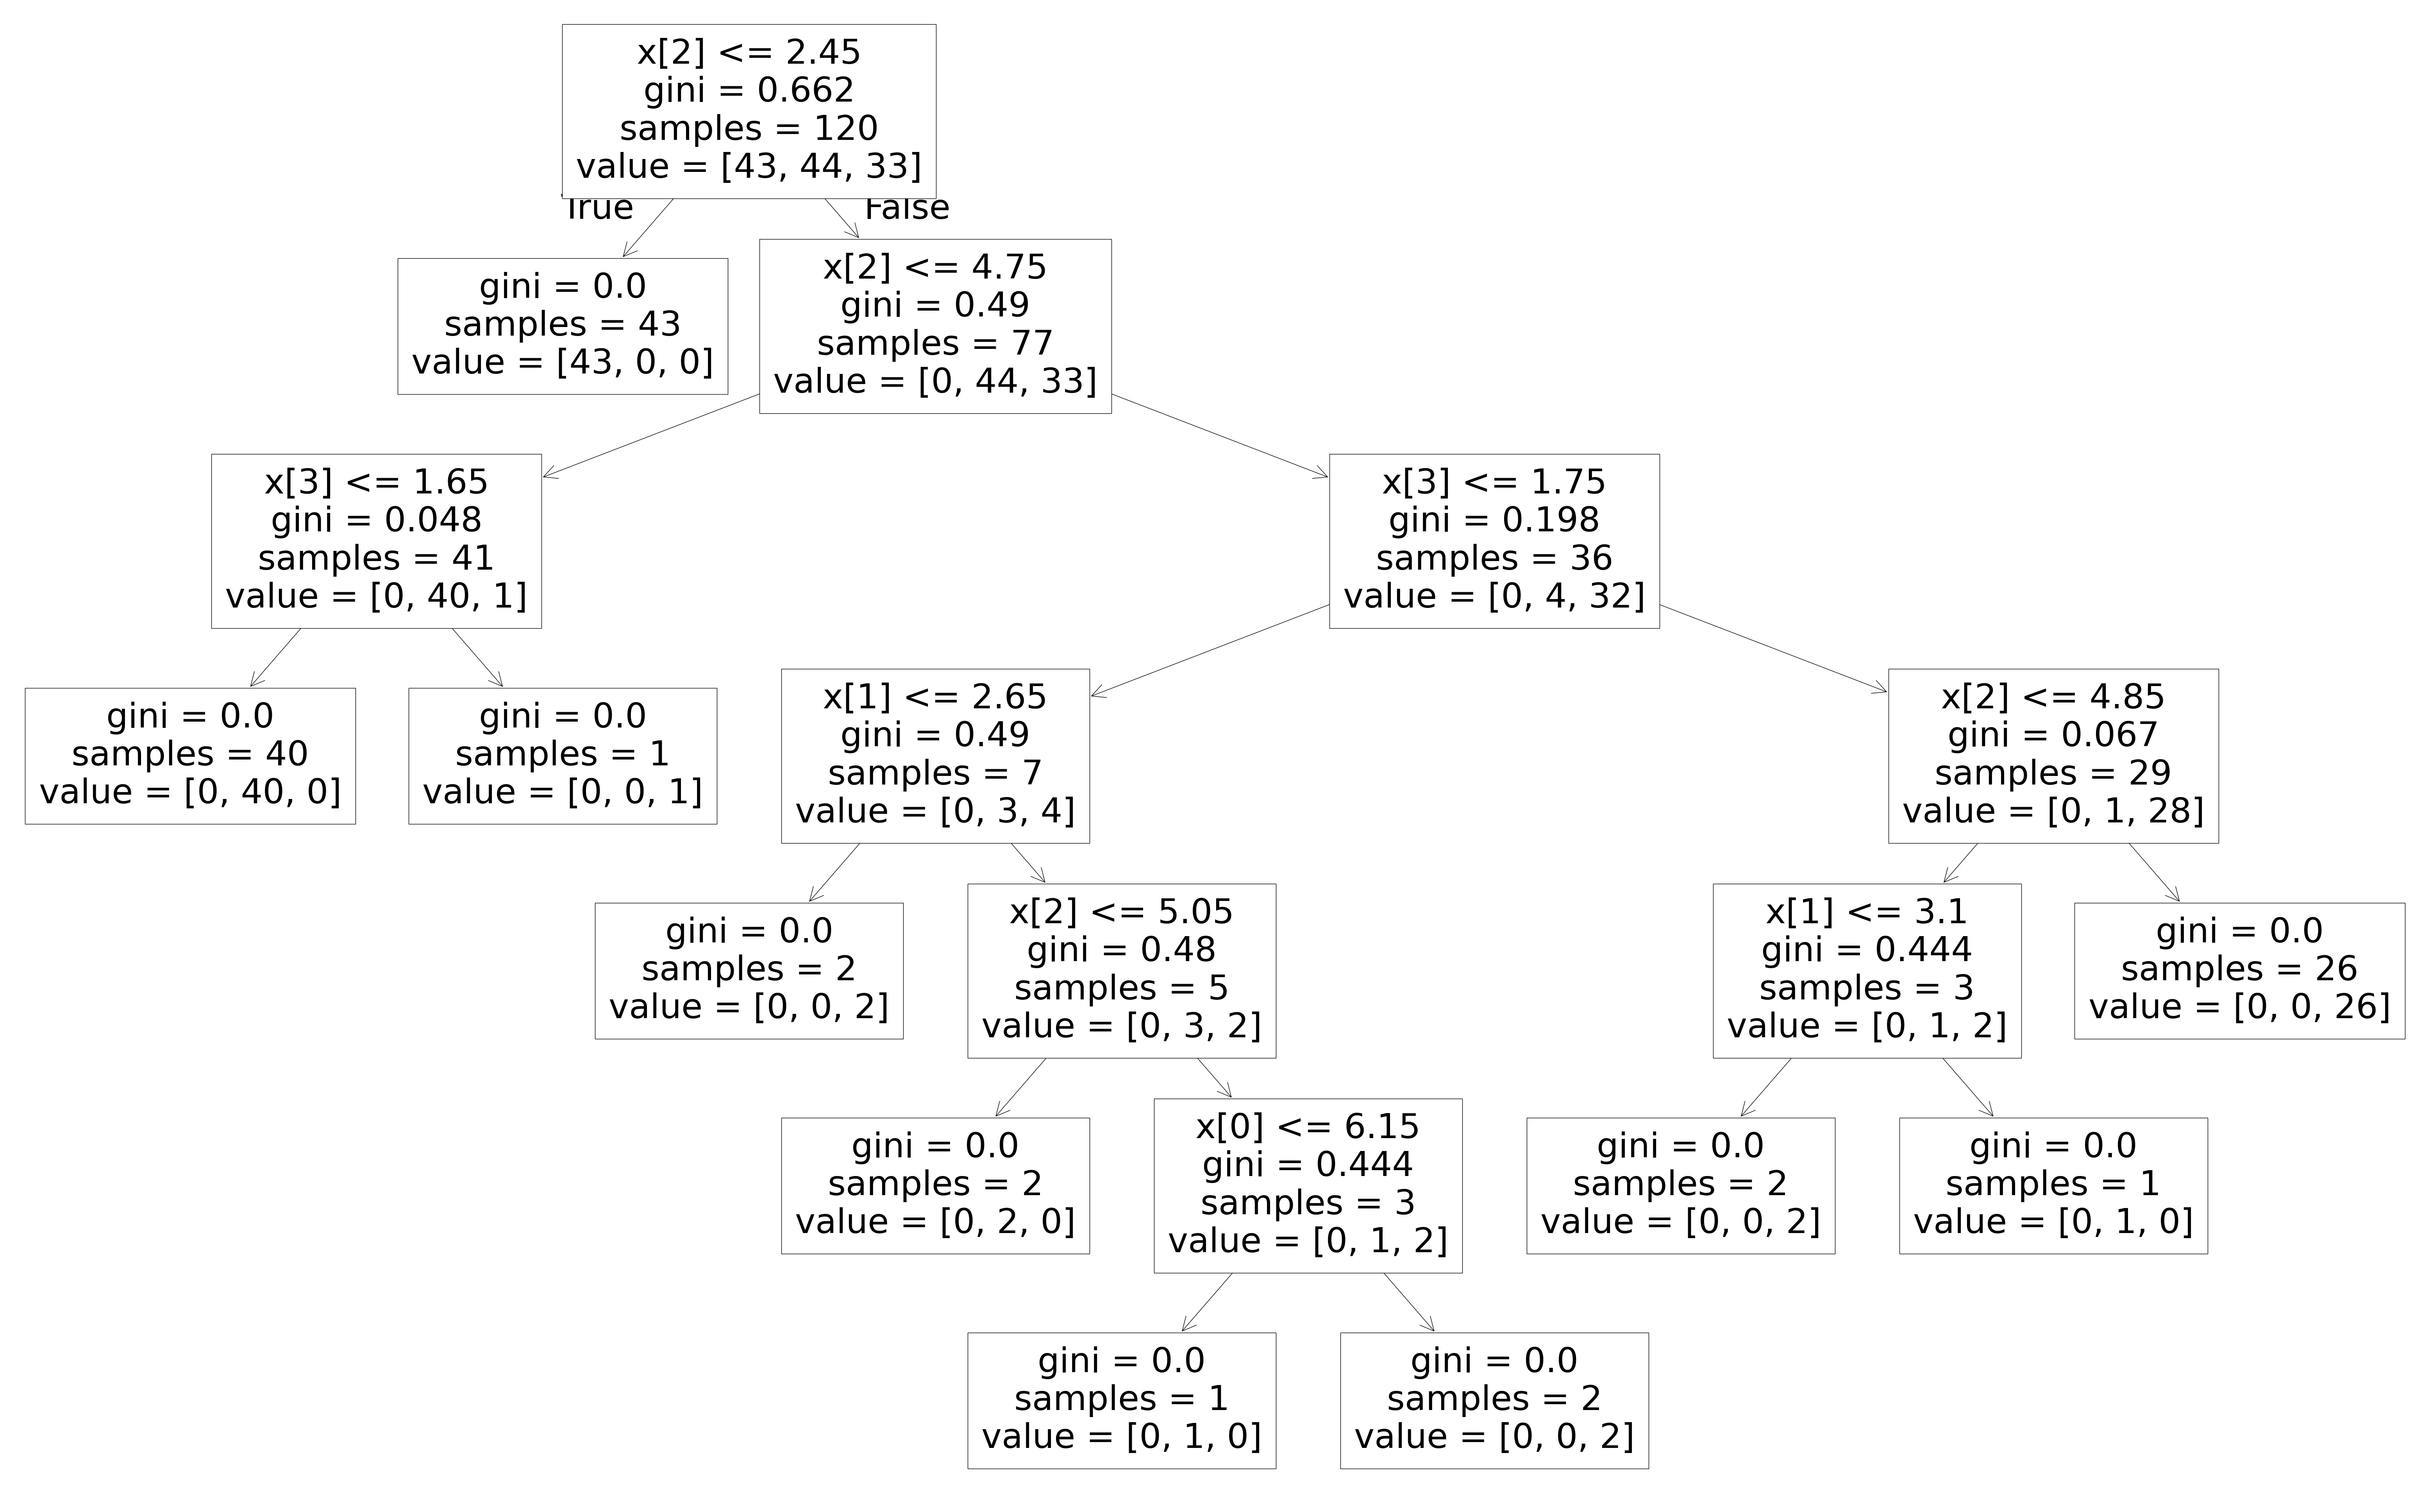

In [18]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf)